In [1]:
import pandas as pd
df = pd.read_csv("../archive/Housing_Macroeconomic_Factors_US (2).csv", encoding="windows-1252", na_values=["", "NA", "null", "NULL", "None", "NaN"])
df_new = df.drop(columns=["Date"])

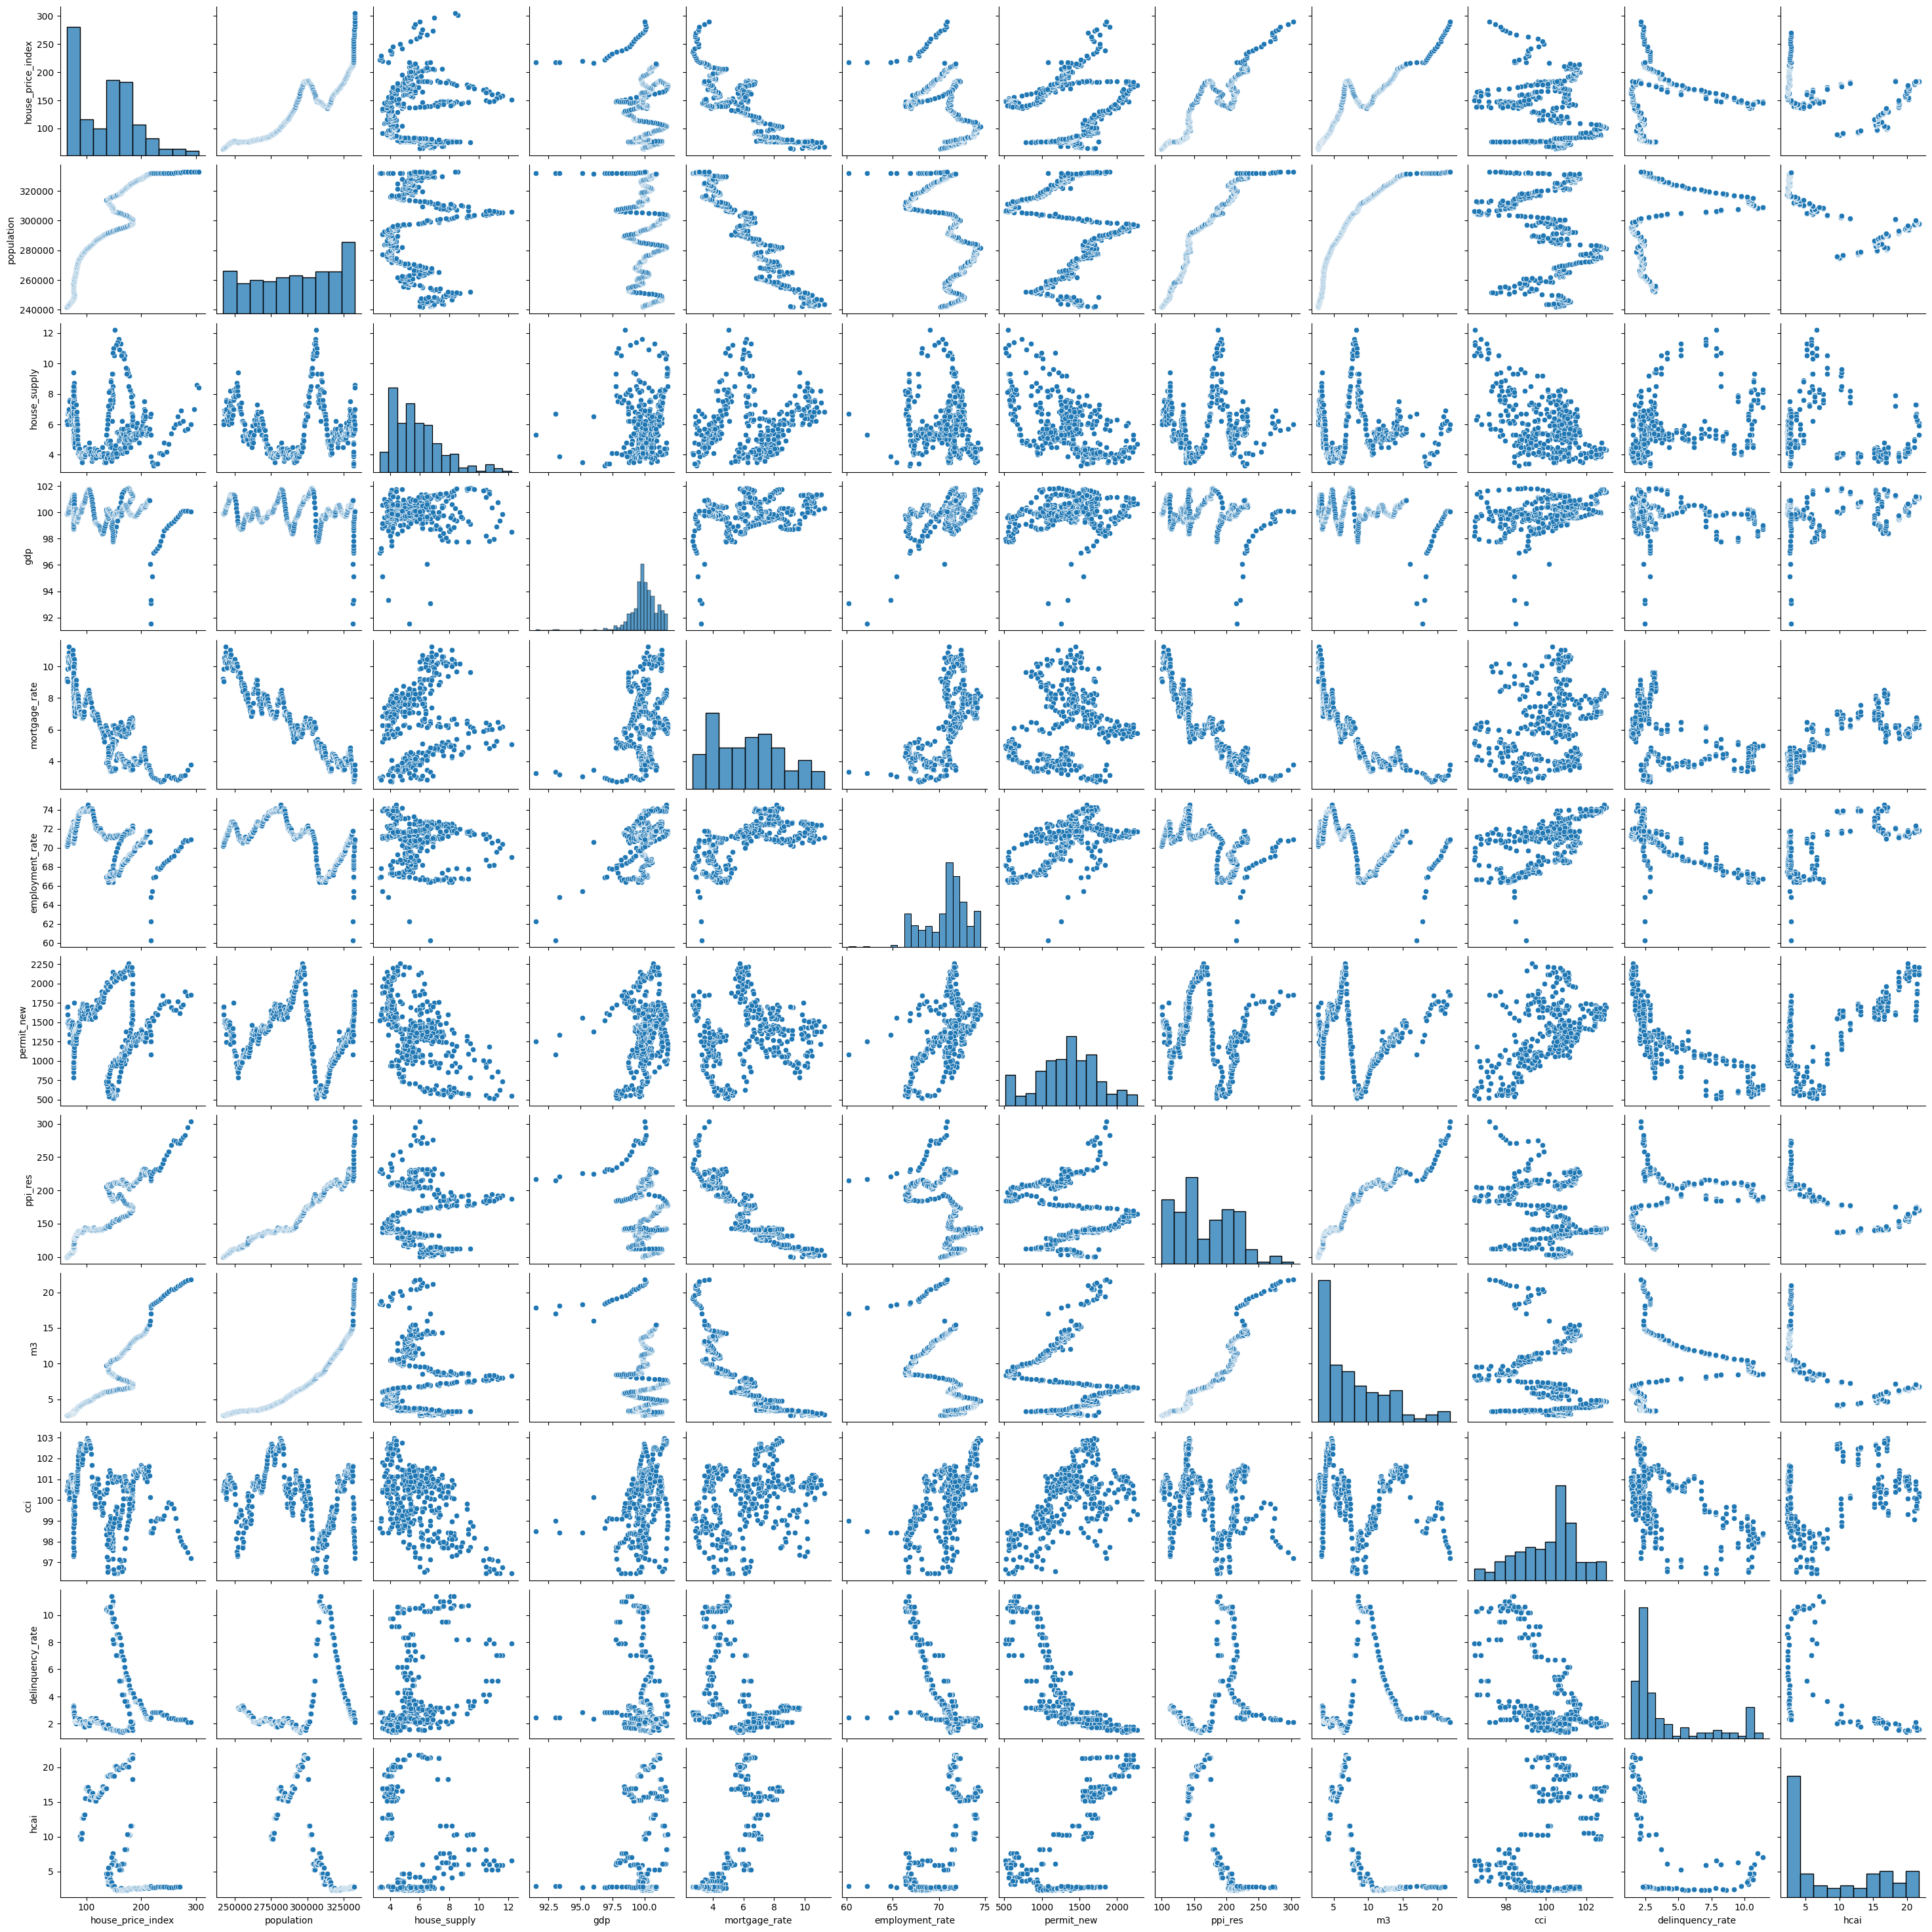

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_new)
plt.show()

In [2]:
print(df_new.isnull().sum())

house_price_index      0
population             0
house_supply           0
gdp                    3
mortgage_rate          3
employment_rate        3
permit_new             3
ppi_res                3
m3                     3
cci                    3
delinquency_rate      51
hcai                 140
dtype: int64


In [3]:
if sum(df_new.isnull().sum()) > 0:
    #If we have any missing values in our dataset we should either fill them with the mean or drop the column, depending on the case
    threshold = 30
    #Threshold for values that are missing in a column
    #The threshold is the percentage of data that is missing in the column that we're willing to tolerate filling with the mean
    for column in df_new.columns:
        print(f"Column: {column}")
        missing_data_percentage = (df_new.isnull().mean() * 100)[column]
        #We make an array of the percentages of missing data in all the columns
        
        if missing_data_percentage > 0: 
            print(f"\tMissing Data percentage: {missing_data_percentage:.2f}%")
            if missing_data_percentage > threshold:
                print(f"\tDropping column: {column}")
                df_new = df_new.drop(column, axis=1)
                # We drop the column if it has more than the threshold percentage of missing data
                #For columns with a large percentage of missing data it might be better to drop them altogether than to assign values that are not real
            else:
                print(f"\tFilling missing values with mean")
                df_new[column] = df_new[column].fillna(df_new[column].mean())
                # For columns with missing data percentage below the threshold, we'll fill the gaps with the mean.
                #This code snippet only works for columns with numeric values, as is the case with all the columns of the three files
        else:
            print(f"\tNo missing values")
            #Doing this we avoid running unnecesary operations on columns with no missing data
else:
    print("No missing values in the table")

Column: house_price_index
	No missing values
Column: population
	No missing values
Column: house_supply
	No missing values
Column: gdp
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: mortgage_rate
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: employment_rate
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: permit_new
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: ppi_res
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: m3
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: cci
	Missing Data percentage: 0.71%
	Filling missing values with mean
Column: delinquency_rate
	Missing Data percentage: 12.00%
	Filling missing values with mean
Column: hcai
	Missing Data percentage: 32.94%
	Dropping column: hcai


In [4]:
from sklearn.model_selection import train_test_split

X = df_new.drop('house_price_index', axis = 1)
y = df_new['house_price_index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [6]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 145.9890919981876
RMSE: 12.08259458883677
R-squared: 0.9597299296797479


In [7]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [8]:
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 6.515345496647751
RMSE: 2.5525174821434136
R-squared: 0.9982027874978906
